## ПР2

#### Подготовил Вадим Пацев группа ИЭоз-60-18

In [171]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t, chi2

import warnings
warnings.filterwarnings('ignore')

In [172]:
# Данные про шахты

df = pd.DataFrame(data={'x': [8,11,12,9,8,8,9,9,8,12], 'y':[5,10,10,7,5,6,6,5,6,8]})
x = df['x']
y = df['y']
df

,x,y
0,8,5
1,11,10
2,12,10
3,9,7
4,8,5
5,8,6
6,9,6
7,9,5
8,8,6
9,12,8


In [173]:
gamma = 0.9
alfa = 1 - gamma
mean_x = np.mean(x)

print("Gamma = ", gamma)
print("Alfa =", alfa)
print("Средний x=", mean_x)

Gamma =  0.9
Alfa = 0.09999999999999998
Средний x= 9.4


In [174]:
est = sm.OLS(y, sm.add_constant(x)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     24.02
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00119
Time:                        19:33:21   Log-Likelihood:                -13.314
No. Observations:                  10   AIC:                             30.63
Df Residuals:                       8   BIC:                             31.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7541      1.976     -1.394      0.2

In [175]:
y_pred = est.params[0]+ est.params[1] * x 
see = (np.sum((y - (x*est.params[1] +  est.params[0]))**2)/est.df_resid)**0.5
print("Оценка коэфициента регрессии m^=", est.params[1])
print("Оценка сдвига b^=", est.params[0])
print("Коэффициент определения R^2=", est.rsquared)
print("Стандартная ошибка возмущений (SEE) s=", see)
print("Стандартные значения ошибок коэфициента s_m^=", est.bse['x'])
print("Стандартные значения ошибок сдвига s_b^=", est.bse['const'])
print("F-статистика", est.fvalue)
print("Степени свободы k2=", est.df_resid)

Оценка коэфициента регрессии m^= 1.0163934426229508
Оценка сдвига b^= -2.754098360655739
Коэффициент определения R^2= 0.7501951600312255
Стандартная ошибка возмущений (SEE) s= 1.024295039463168
Стандартные значения ошибок коэфициента s_m^= 0.20736246951923795
Стандартные значения ошибок сдвига s_b^= 1.9759369407631948
F-статистика 24.02499999999999
Степени свободы k2= 8.0


### 1.   Найти с надежностью γ=0,9 интервальные оценки коэффициента регрессии m и дисперсии sigma2 возмущений.

In [176]:
t_val =abs(t.ppf(0.1/2, est.df_resid))
t_v = est.params[1] + t_val*est.bse['x']
t_n =est.params[1] - t_val*est.bse['x']
print("Порог Т-статистики t(alfa=0.05, k=k2=8)=", t_val)
print("Верхняя граница =", t_v)
print("Нижняя граница =", t_n)

Порог Т-статистики t(alfa=0.05, k=k2=8)= 1.8595480375228428
Верхняя граница = 1.40199391587334
Нижняя граница = 0.6307929693725616


In [177]:
chi_l = chi2.ppf(q = alfa/2,df = est.df_resid)
chi_r = chi2.ppf(q =1 - alfa/2,df = est.df_resid)
print("Квантили хи-квадрат правый =", chi_r )
print("Квантили хи-квадрат левый =", chi_l )

Квантили хи-квадрат правый = 15.50731305586545
Квантили хи-квадрат левый = 2.7326367934996614


In [178]:
#Вычислим Qe (SSE) — сумма квадратов оценок ошибок
sse = np.sum((y_pred - y)**2)
print("Qe = ", sse)

Qe =  8.393442622950822


In [179]:
print("Верхняя граница доверительного интервала дисперсии sigma2", sse/chi_l)
print("Нижняя граница доверительного интервала дисперсии sigma2", sse/chi_r)

Верхняя граница доверительного интервала дисперсии sigma2 3.0715544205936793
Нижняя граница доверительного интервала дисперсии sigma2 0.5412570567649762


### 2.   Построить 90-процентные доверительные интервалы линии регрессии и индивидуальных значений отклика.


In [180]:
x_2 =  np.array([6,7,8,9,10,11,12,13,14])
y_ = x_2* est.params[1] +  est.params[0]
s_y_ = (see**2/10 + (x_2 - mean_x)**2*est.bse['x']**2)**0.5
n_g = y_- t_val * s_y_
v_g = y_+ t_val * s_y_
s_y_star = (s_y_**2 + see**2)**0.5
n_ind = y_- t_val * s_y_star
v_ind = y_+ t_val * s_y_star

In [181]:
data={'x': x_2, 'y^':y_, "s_y^":s_y_, "НГ": n_g, "ВГ": v_g, "s_y*": s_y_star, 'N ind': n_ind, 'V ind': v_ind}
pd.DataFrame(data=data)

,x,y^,s_y^,НГ,ВГ,s_y*,N ind,V ind
0,6,3.344262,0.775879,1.901477,4.787047,1.284978,0.954784,5.733741
1,7,4.360656,0.593796,3.256464,5.464847,1.183965,2.159015,6.562296
2,8,5.377049,0.434967,4.568207,6.185892,1.112824,3.307700,7.446398
3,9,6.393443,0.334362,5.771681,7.015205,1.077487,4.389804,8.397081
4,10,7.409836,0.346984,6.764603,8.055069,1.081470,5.398790,9.420882
5,11,8.426230,0.463677,7.564001,9.288458,1.124356,6.335436,10.517023
6,12,9.442623,0.628962,8.273039,10.612207,1.201987,7.207470,11.677776
7,13,10.459016,0.813749,8.945811,11.972222,1.308193,8.026369,12.891663
8,14,11.475410,1.007363,9.602169,13.348650,1.436649,8.803891,14.146928


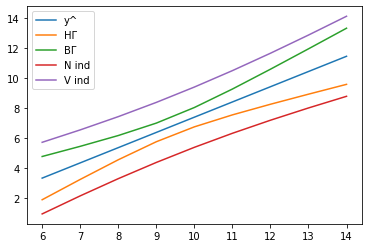

In [182]:
for key in data.keys():
    if key != "s_y^" and key != "s_y*" and key != 'x':
        plt.plot(x_2, data[key], label=key)
plt.legend()
plt.show()